In [2]:
#Creating a Dataframe
import pandas as pd
df=pd.read_table("/content/Restaurant_Reviews.tsv")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


**Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()
#Here as 50% is 0.5 hence data is BALANCED

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
df.shape

(1000, 2)

**Preparing Graphs**

<Axes: ylabel='count'>

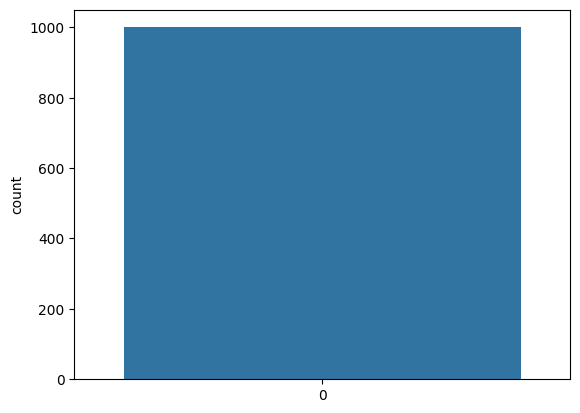

In [6]:

import seaborn as sns
sns.countplot(df["Liked"])

<ipython-input-7-ae58685bf4b2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Liked'])


<Axes: xlabel='Liked', ylabel='Density'>

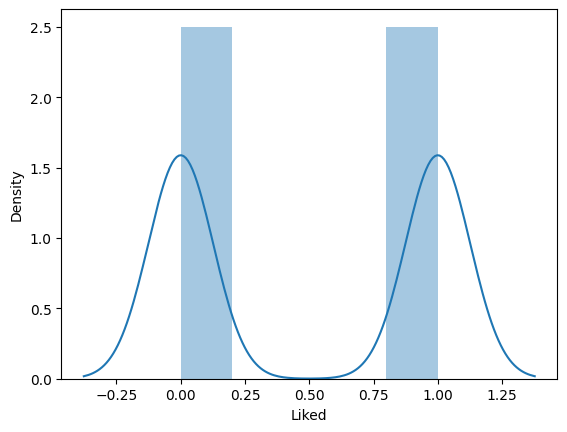

In [7]:
sns.distplot(df['Liked'])

**Method1:Creating SVC model using count vectorizer**



In [8]:
#Choosing the X and Y values
x=df["Review"].values


In [9]:
y=df["Liked"].values


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)

In [11]:
#Using count vectorizer for Preprocessing of data
from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer(stop_words="english")
x_train_vect=CV.fit_transform(x_train)
x_test_vect=CV.transform(x_test)
x_train_vect

<750x1505 sparse matrix of type '<class 'numpy.int64'>'
	with 3616 stored elements in Compressed Sparse Row format>

In [12]:
#Using the SVC model Classifier
from sklearn.svm import SVC
model1=SVC()
model1.fit(x_train_vect,y_train)


SVC()

In [13]:
y_pred1=model1.predict(x_test_vect)

In [14]:
#Now for testing accuracy only accuracy score is sufficient because data is BALANCED
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.776

**Method 2: Creating a pipeline with Vectorization model and ML algorithm to predict the final sentiment**

In [15]:
from sklearn.pipeline import make_pipeline
model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [16]:
y_pred2=model2.predict(x_test)


In [17]:
accuracy_score(y_pred2,y_test)

0.808

**Method 3: Creating NB model and count vectorizer separately**


In [18]:
#We have already done vectorization and stored values in x_train_vect and x_test_vect
#So moving on to apply Naive Bayes Model for predicting values
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()
model3.fit(x_train_vect,y_train)


MultinomialNB()

In [19]:
y_pred3=model3.predict(x_test_vect)


In [20]:
accuracy_score(y_pred3,y_test)

0.74

**Method 4: Creating a pipeline with Vectorization model and ML algorithm to predict the
final sentiment for the multinomialNB and CountVectorizer**

In [21]:
#Already imported pipeline so not repeating again
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [22]:
y_pred4=model4.predict(x_test)

In [23]:
accuracy_score(y_pred4,y_test)

0.784

In [24]:
#Hence the highest accuracy we have got for method 2 , e.i. Pipeline method which includes SVC model.

In [25]:
#Using Joblib to create and save model with highest accuracy
import joblib
joblib.dump(model2,"Sentiments")

['Sentiments']

In [26]:
reloaded_model=joblib.load("Sentiments")

In [27]:
!pip install streamlit --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 26.1 MB/s eta 0:00:00


In [28]:
%%writefile app.py
import streamlit as st
import joblib
st.title("Sentiment Analysis")

reloaded_model=joblib.load("Sentiments")

input1 = st.text_input("Please Enter your Review")
output1 = reloaded_model.predict([input1])

if st.button("PREDICT") :
  op = ['Negative review 😢' , 'Positive review 👌']
  st.title(op[output1[0]])


Writing app.py


In [ ]:
!streamlit run app.py  & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://108.59.83.10:8501

npx: installed 22 in 4.775s
your url is: https://ten-crabs-clap.loca.lt


**Sentiment Analysis** : sentiment analysis which is also known as opinion mining is an aproach of NLP ( natural language processing ) which used to determine the emotion or feeling of some data or simply to say reviews. Many organizations use this technique to analyze their reviews of their products. this is wonderful method to analyze reviews of any products or data.


**Twitter Sentiment**: this is used to find out negative and positive reviews on your products or data in social media platforms such as twitter. This immensly helps you to detect angry or negative reviews.
